In [41]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
df = pd.DataFrame(X)
df['label'] = y
print(df.head())
# loading the dataset then prints the first few rows for inspection

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  label  
0  6.0  13.0  10.0   0.0  0.0  0.0      0  
1  0.0  11.0  16.0  10.0  0.0  0.0      1  
2  0.0   3.0  11.0  16.0  9.0  0.0      2  
3  7.0  13.0  13.0   9.0  0.0  0.0      3  
4  0.0   2.0  16.0   4.0  0.0  0.0      4  

[5 rows x 65 columns]


In [43]:
#Split the data into training and testing sets(80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
)

In [44]:
# Step 4: Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Pick 5 sample to visualize and plotting them
sample_indices = [0, 1, 2, 3, 4]
plt.figure(figsize=(12, 3))
for i, idx in enumerate(sample_indices):
    image = X_train_scaled[idx].reshape(8, 8)  # reshape back to 8x8
    label = y_train[idx]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.suptitle("5 Sample Normalized Digit Images")
plt.tight_layout()
plt.show()

=== Linear Kernel ===
Accuracy: 0.9722222222222222
F1 Score (macro): 0.9721467914872836
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      1.00      0.96        44
           2       1.00      1.00      1.00        30
           3       0.98      1.00      0.99        43
           4       0.97      1.00      0.99        35
           5       0.97      1.00      0.99        36
           6       1.00      0.97      0.99        37
           7       0.97      1.00      0.99        35
           8       0.93      0.82      0.87        33
           9       1.00      0.93      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



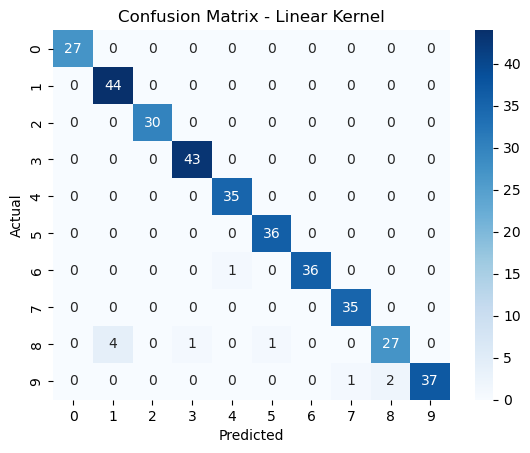

In [46]:
#Linear kernel
model_linear = SVC(kernel='linear')
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)

print("=== Linear Kernel ===")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("F1 Score (macro):", f1_score(y_test, y_pred_linear, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

cm = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Linear Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

=== RBF Kernel (C=0.01, gamma=0.1) ===
Accuracy: 0.075
F1 Score (macro): 0.013953488372093023
Classification Report:
               precision    recall  f1-score   support

           0       0.07      1.00      0.14        27
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        40

    accuracy                           0.07       360
   macro avg       0.01      0.10      0.01       360
weighted avg       0.01      0.07      0.01       360



=== RBF Kernel (C=0.01, gamma=0.01) ===
Accuracy: 0.09166666666666666
F1 Score (macro): 0.047506561679790026
Classification Report:
               precision    recall  f1-score   support

           0       0.08      1.00      0.14        27
           1       0.00      0.00      0.00        44
           2       1.00      0.20      0.33        30
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        40

    accuracy                           0.09       360
   macro avg       0.11      0.12      0.05       360
weighted avg       0.09      0.09      0.04       360



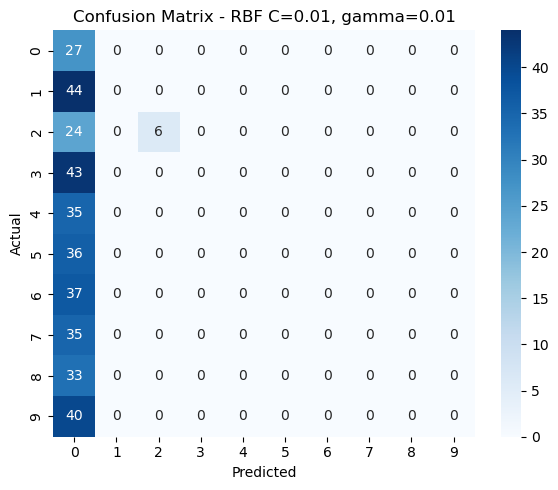

=== RBF Kernel (C=0.01, gamma=0.001) ===
Accuracy: 0.075
F1 Score (macro): 0.013953488372093023
Classification Report:
               precision    recall  f1-score   support

           0       0.07      1.00      0.14        27
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        40

    accuracy                           0.07       360
   macro avg       0.01      0.10      0.01       360
weighted avg       0.01      0.07      0.01       360



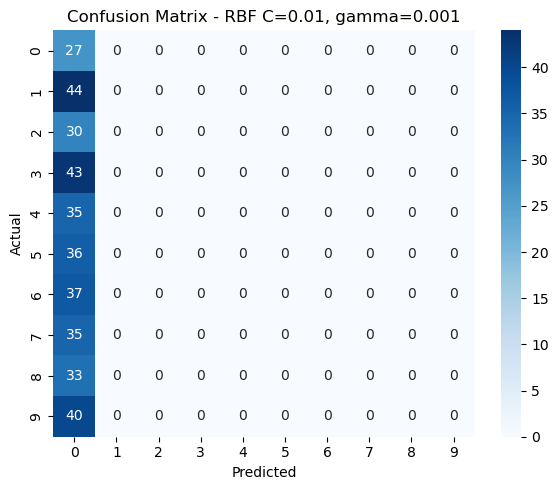

=== RBF Kernel (C=0.01, gamma=0.0001) ===
Accuracy: 0.075
F1 Score (macro): 0.013953488372093023
Classification Report:
               precision    recall  f1-score   support

           0       0.07      1.00      0.14        27
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        40

    accuracy                           0.07       360
   macro avg       0.01      0.10      0.01       360
weighted avg       0.01      0.07      0.01       360



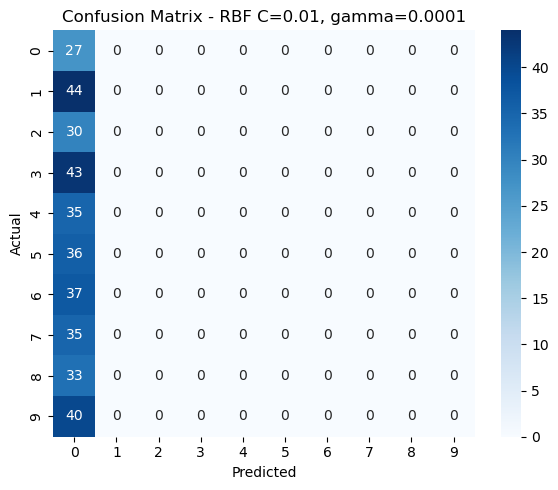

=== RBF Kernel (C=0.01, gamma=1e-05) ===
Accuracy: 0.075
F1 Score (macro): 0.013953488372093023
Classification Report:
               precision    recall  f1-score   support

           0       0.07      1.00      0.14        27
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        40

    accuracy                           0.07       360
   macro avg       0.01      0.10      0.01       360
weighted avg       0.01      0.07      0.01       360



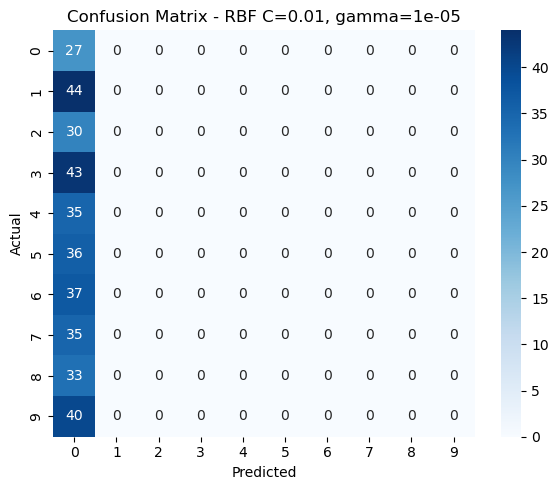

=== RBF Kernel (C=0.1, gamma=0.1) ===
Accuracy: 0.3
F1 Score (macro): 0.3198994859320664
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.83        27
           1       1.00      0.36      0.53        44
           2       0.11      1.00      0.19        30
           3       1.00      0.09      0.17        43
           4       1.00      0.17      0.29        35
           5       1.00      0.08      0.15        36
           6       1.00      0.70      0.83        37
           7       1.00      0.11      0.21        35
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        40

    accuracy                           0.30       360
   macro avg       0.71      0.32      0.32       360
weighted avg       0.72      0.30      0.31       360



=== RBF Kernel (C=0.1, gamma=0.01) ===
Accuracy: 0.9361111111111111
F1 Score (macro): 0.93682414719571
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.93      0.89      0.91        44
           2       0.88      0.93      0.90        30
           3       0.97      0.91      0.94        43
           4       0.92      0.97      0.94        35
           5       0.97      0.97      0.97        36
           6       1.00      0.97      0.99        37
           7       0.97      0.97      0.97        35
           8       0.85      0.85      0.85        33
           9       0.90      0.93      0.91        40

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



=== RBF Kernel (C=0.1, gamma=0.001) ===
Accuracy: 0.6388888888888888
F1 Score (macro): 0.5996878748121209
Classification Report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57        27
           1       1.00      0.48      0.65        44
           2       0.36      0.97      0.53        30
           3       1.00      0.19      0.31        43
           4       0.82      0.94      0.88        35
           5       0.70      0.92      0.80        36
           6       0.83      0.95      0.89        37
           7       0.80      0.94      0.87        35
           8       0.80      0.24      0.37        33
           9       1.00      0.07      0.14        40

    accuracy                           0.64       360
   macro avg       0.77      0.67      0.60       360
weighted avg       0.80      0.64      0.59       360



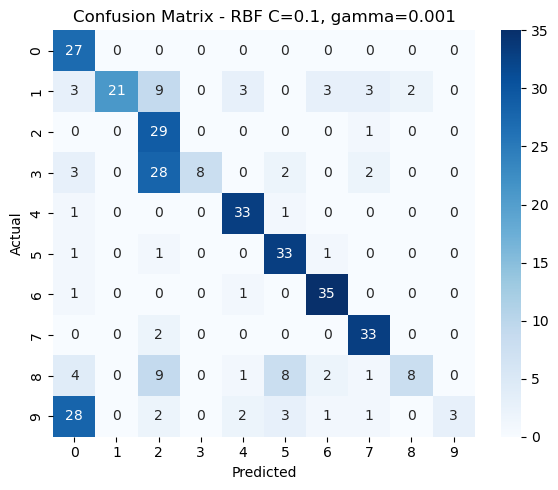

=== RBF Kernel (C=0.1, gamma=0.0001) ===
Accuracy: 0.075
F1 Score (macro): 0.013953488372093023
Classification Report:
               precision    recall  f1-score   support

           0       0.07      1.00      0.14        27
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        40

    accuracy                           0.07       360
   macro avg       0.01      0.10      0.01       360
weighted avg       0.01      0.07      0.01       360



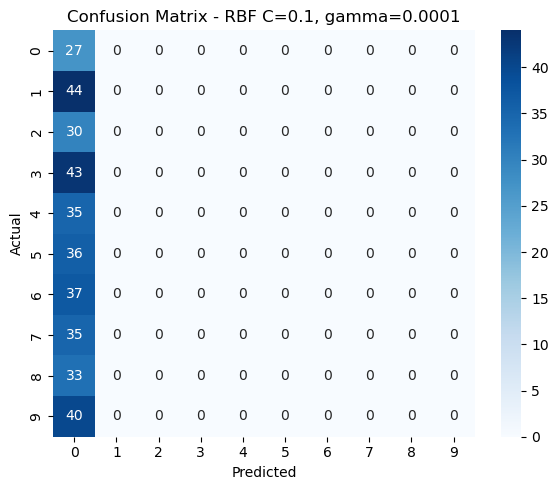

=== RBF Kernel (C=0.1, gamma=1e-05) ===
Accuracy: 0.075
F1 Score (macro): 0.013953488372093023
Classification Report:
               precision    recall  f1-score   support

           0       0.07      1.00      0.14        27
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        40

    accuracy                           0.07       360
   macro avg       0.01      0.10      0.01       360
weighted avg       0.01      0.07      0.01       360



=== RBF Kernel (C=1, gamma=0.1) ===
Accuracy: 0.9305555555555556
F1 Score (macro): 0.9301383024948319
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.98      0.95      0.97        44
           2       0.65      1.00      0.79        30
           3       0.96      1.00      0.98        43
           4       1.00      0.83      0.91        35
           5       0.92      0.97      0.95        36
           6       1.00      0.92      0.96        37
           7       1.00      0.86      0.92        35
           8       0.94      0.88      0.91        33
           9       0.97      0.93      0.95        40

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.93       360
weighted avg       0.95      0.93      0.93       360



=== RBF Kernel (C=1, gamma=0.01) ===
Accuracy: 0.975
F1 Score (macro): 0.9747593327326707
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      1.00      0.97        44
           2       0.97      1.00      0.98        30
           3       0.98      1.00      0.99        43
           4       1.00      0.97      0.99        35
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        35
           8       0.90      0.85      0.88        33
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



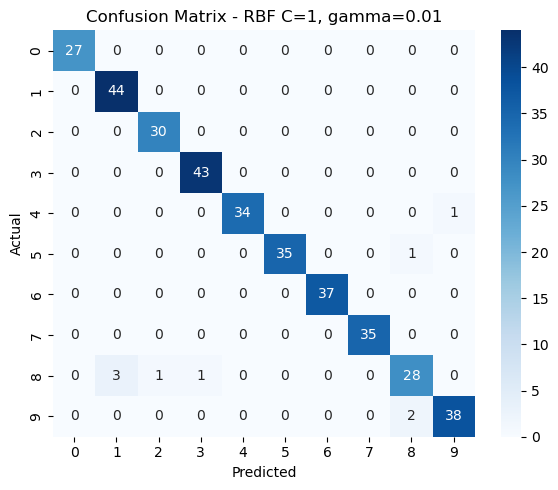

=== RBF Kernel (C=1, gamma=0.001) ===
Accuracy: 0.9527777777777777
F1 Score (macro): 0.9538709995813205
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.93      0.98      0.96        44
           2       1.00      0.93      0.97        30
           3       0.97      0.91      0.94        43
           4       1.00      0.97      0.99        35
           5       0.97      1.00      0.99        36
           6       1.00      0.97      0.99        37
           7       0.97      0.97      0.97        35
           8       0.83      0.88      0.85        33
           9       0.90      0.93      0.91        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



=== RBF Kernel (C=1, gamma=0.0001) ===
Accuracy: 0.6972222222222222
F1 Score (macro): 0.679324061017547
Classification Report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64        27
           1       0.95      0.41      0.57        44
           2       0.50      0.97      0.66        30
           3       1.00      0.49      0.66        43
           4       0.91      0.91      0.91        35
           5       0.60      0.94      0.73        36
           6       0.88      0.97      0.92        37
           7       0.89      0.94      0.92        35
           8       0.46      0.33      0.39        33
           9       1.00      0.25      0.40        40

    accuracy                           0.70       360
   macro avg       0.77      0.72      0.68       360
weighted avg       0.79      0.70      0.68       360



=== RBF Kernel (C=1, gamma=1e-05) ===
Accuracy: 0.075
F1 Score (macro): 0.013953488372093023
Classification Report:
               precision    recall  f1-score   support

           0       0.07      1.00      0.14        27
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        40

    accuracy                           0.07       360
   macro avg       0.01      0.10      0.01       360
weighted avg       0.01      0.07      0.01       360



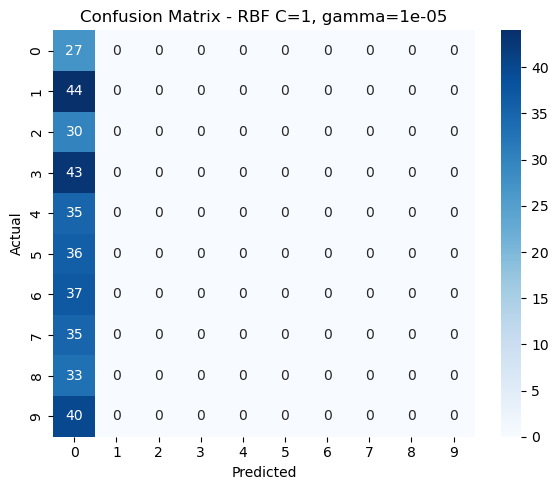

=== RBF Kernel (C=10, gamma=0.1) ===
Accuracy: 0.9277777777777778
F1 Score (macro): 0.9277618451096445
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.98      0.95      0.97        44
           2       0.65      1.00      0.79        30
           3       0.95      0.98      0.97        43
           4       1.00      0.83      0.91        35
           5       0.92      0.97      0.95        36
           6       1.00      0.92      0.96        37
           7       1.00      0.86      0.92        35
           8       0.94      0.88      0.91        33
           9       0.95      0.93      0.94        40

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360



=== RBF Kernel (C=10, gamma=0.01) ===
Accuracy: 0.975
F1 Score (macro): 0.9752022999180323
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.96      1.00      0.98        44
           2       0.97      1.00      0.98        30
           3       0.98      0.98      0.98        43
           4       0.97      0.97      0.97        35
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        35
           8       0.97      0.88      0.92        33
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.97       360



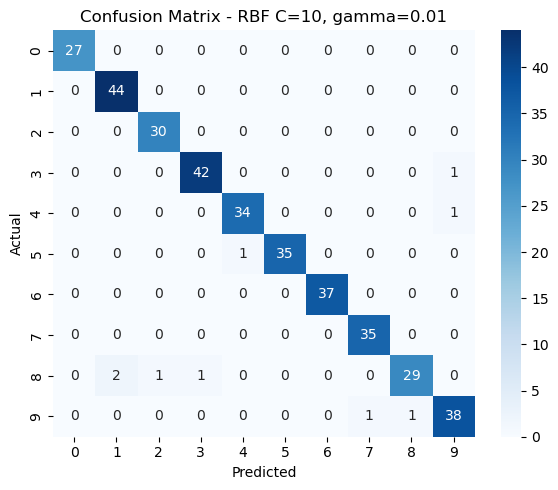

=== RBF Kernel (C=10, gamma=0.001) ===
Accuracy: 0.9777777777777777
F1 Score (macro): 0.9777440828673107
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.94      1.00      0.97        44
           2       1.00      1.00      1.00        30
           3       0.98      1.00      0.99        43
           4       1.00      0.97      0.99        35
           5       1.00      1.00      1.00        36
           6       1.00      0.97      0.99        37
           7       1.00      1.00      1.00        35
           8       0.94      0.88      0.91        33
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



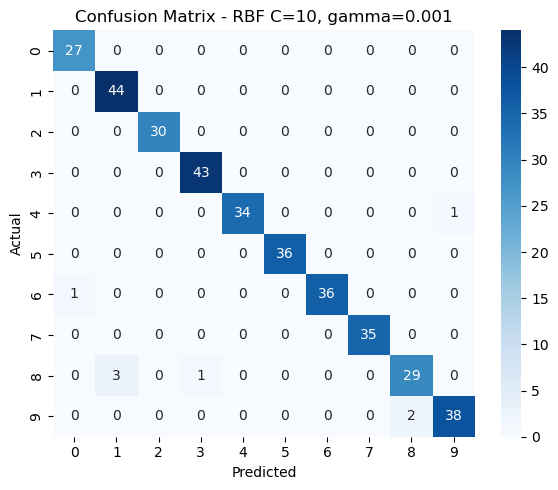

=== RBF Kernel (C=10, gamma=0.0001) ===
Accuracy: 0.95
F1 Score (macro): 0.9510108892175181
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.93      0.98      0.96        44
           2       1.00      0.93      0.97        30
           3       0.97      0.91      0.94        43
           4       1.00      0.94      0.97        35
           5       0.97      1.00      0.99        36
           6       1.00      0.97      0.99        37
           7       0.94      0.97      0.96        35
           8       0.83      0.88      0.85        33
           9       0.90      0.93      0.91        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



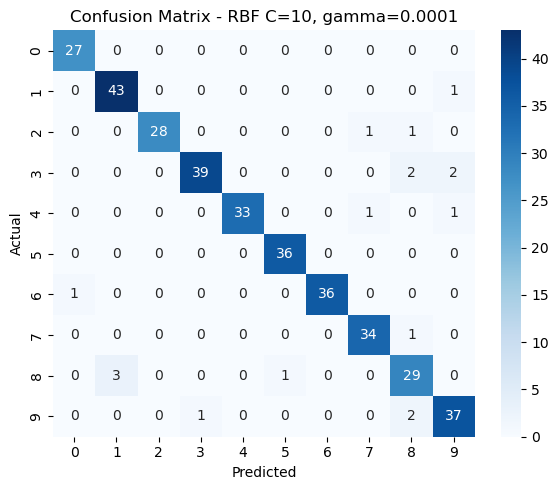

=== RBF Kernel (C=10, gamma=1e-05) ===
Accuracy: 0.7055555555555556
F1 Score (macro): 0.6913391341756812
Classification Report:
               precision    recall  f1-score   support

           0       0.45      1.00      0.62        27
           1       0.95      0.41      0.57        44
           2       0.50      0.93      0.65        30
           3       1.00      0.51      0.68        43
           4       0.94      0.91      0.93        35
           5       0.62      0.94      0.75        36
           6       0.90      0.97      0.94        37
           7       0.89      0.94      0.92        35
           8       0.52      0.42      0.47        33
           9       1.00      0.25      0.40        40

    accuracy                           0.71       360
   macro avg       0.78      0.73      0.69       360
weighted avg       0.80      0.71      0.69       360



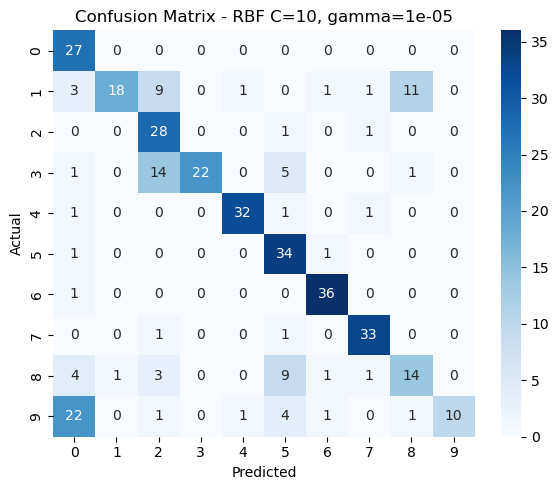

=== RBF Kernel (C=100, gamma=0.1) ===
Accuracy: 0.9277777777777778
F1 Score (macro): 0.9277618451096445
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.98      0.95      0.97        44
           2       0.65      1.00      0.79        30
           3       0.95      0.98      0.97        43
           4       1.00      0.83      0.91        35
           5       0.92      0.97      0.95        36
           6       1.00      0.92      0.96        37
           7       1.00      0.86      0.92        35
           8       0.94      0.88      0.91        33
           9       0.95      0.93      0.94        40

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360



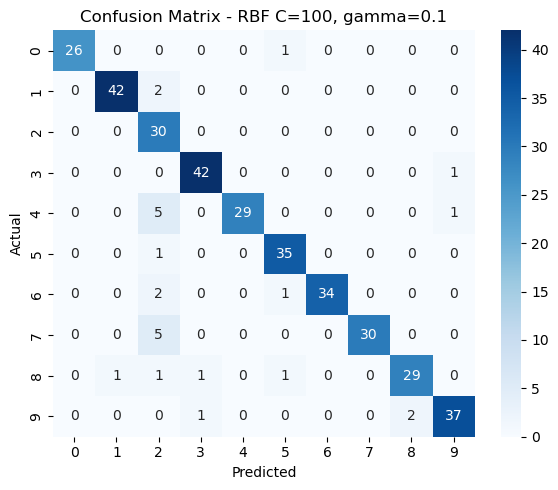

=== RBF Kernel (C=100, gamma=0.01) ===
Accuracy: 0.975
F1 Score (macro): 0.9752022999180323
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.96      1.00      0.98        44
           2       0.97      1.00      0.98        30
           3       0.98      0.98      0.98        43
           4       0.97      0.97      0.97        35
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        35
           8       0.97      0.88      0.92        33
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.97       360



=== RBF Kernel (C=100, gamma=0.001) ===
Accuracy: 0.975
F1 Score (macro): 0.9745802978589209
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.94      1.00      0.97        44
           2       1.00      1.00      1.00        30
           3       0.98      1.00      0.99        43
           4       1.00      1.00      1.00        35
           5       0.97      1.00      0.99        36
           6       1.00      0.97      0.99        37
           7       0.97      1.00      0.99        35
           8       0.93      0.85      0.89        33
           9       1.00      0.93      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



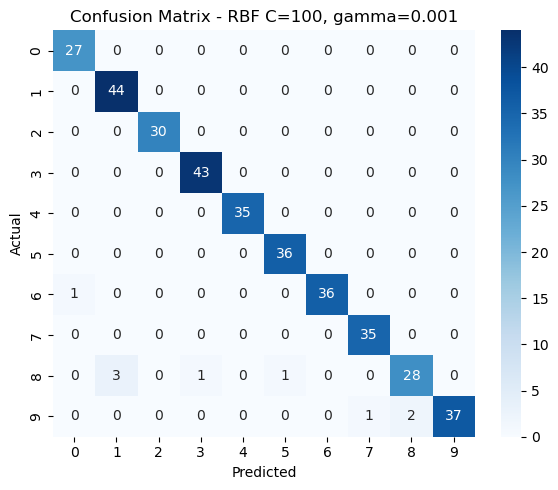

=== RBF Kernel (C=100, gamma=0.0001) ===
Accuracy: 0.975
F1 Score (macro): 0.974900576735761
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.94      1.00      0.97        44
           2       1.00      1.00      1.00        30
           3       0.98      1.00      0.99        43
           4       1.00      0.97      0.99        35
           5       1.00      1.00      1.00        36
           6       1.00      0.97      0.99        37
           7       1.00      0.97      0.99        35
           8       0.91      0.88      0.89        33
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



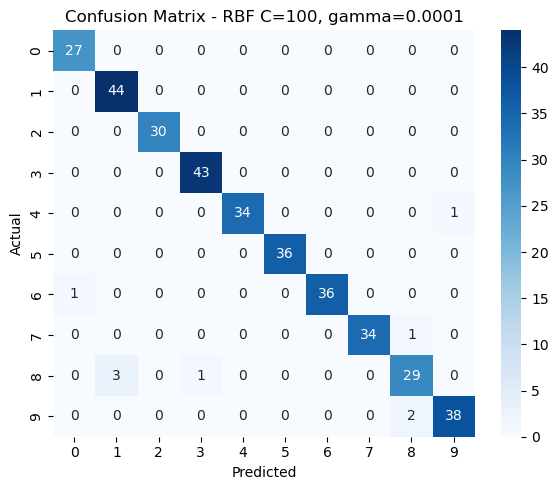

=== RBF Kernel (C=100, gamma=1e-05) ===
Accuracy: 0.95
F1 Score (macro): 0.9510108892175181
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.93      0.98      0.96        44
           2       1.00      0.93      0.97        30
           3       0.97      0.91      0.94        43
           4       1.00      0.94      0.97        35
           5       0.97      1.00      0.99        36
           6       1.00      0.97      0.99        37
           7       0.94      0.97      0.96        35
           8       0.83      0.88      0.85        33
           9       0.90      0.93      0.91        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



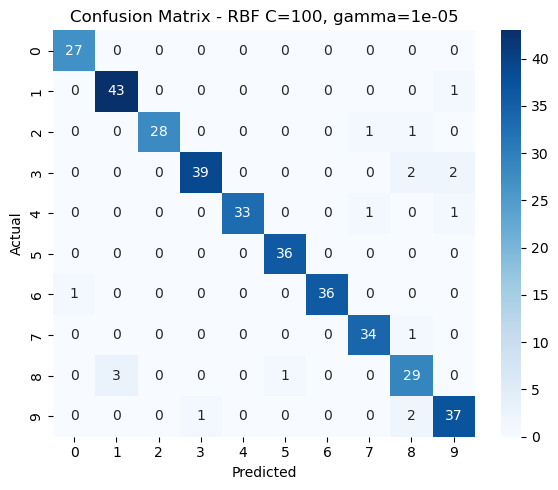

In [48]:
# RBF kernel with different C and gamma
for C in [0.01, 0.1, 1, 10, 100]:
    for gamma in [0.1, 0.01, 0.001, 0.0001, 0.00001]:
        model_rbf = SVC(kernel='rbf', C=C, gamma=gamma)
        model_rbf.fit(X_train_scaled, y_train)
        y_pred_rbf = model_rbf.predict(X_test_scaled)

        print("=" * 70)
        print(f"=== RBF Kernel (C={C}, gamma={gamma}) ===")
        print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
        print("F1 Score (macro):", f1_score(y_test, y_pred_rbf, average='macro', zero_division=0))
        print("Classification Report:\n", classification_report(y_test, y_pred_rbf, zero_division=0))

        cm = confusion_matrix(y_test, y_pred_rbf)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix - RBF C={C}, gamma={gamma}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

=== Polynomial Kernel (degree=2) ===
Accuracy: 0.9694444444444444
F1 Score (macro): 0.9694394509464029
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.96      1.00      0.98        44
           2       0.94      0.97      0.95        30
           3       0.93      0.98      0.95        43
           4       1.00      0.97      0.99        35
           5       1.00      1.00      1.00        36
           6       1.00      0.97      0.99        37
           7       1.00      0.97      0.99        35
           8       0.89      0.94      0.91        33
           9       1.00      0.93      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



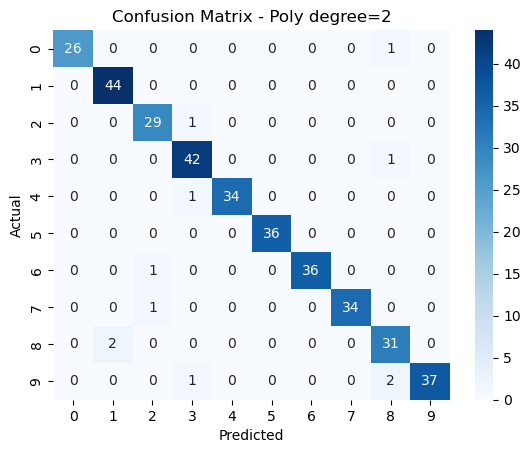

=== Polynomial Kernel (degree=3) ===
Accuracy: 0.9472222222222222
F1 Score (macro): 0.9491695895683122
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        44
           2       1.00      0.83      0.91        30
           3       1.00      0.91      0.95        43
           4       1.00      0.97      0.99        35
           5       0.97      0.97      0.97        36
           6       1.00      0.97      0.99        37
           7       1.00      0.97      0.99        35
           8       0.66      1.00      0.80        33
           9       0.97      0.85      0.91        40

    accuracy                           0.95       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



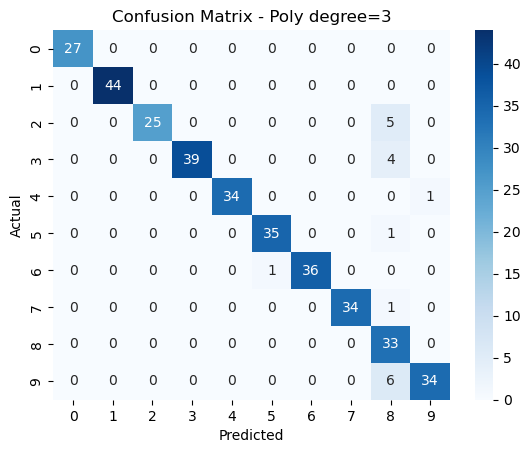

In [49]:
#Polynomial kernel degrees 2 and 3
for degree in [2, 3]:
    model_poly = SVC(kernel='poly', degree=degree)
    model_poly.fit(X_train_scaled, y_train)
    y_pred_poly = model_poly.predict(X_test_scaled)

    print(f"=== Polynomial Kernel (degree={degree}) ===")
    print("Accuracy:", accuracy_score(y_test, y_pred_poly))
    print("F1 Score (macro):", f1_score(y_test, y_pred_poly, average='macro'))
    print("Classification Report:\n", classification_report(y_test, y_pred_poly))

    cm = confusion_matrix(y_test, y_pred_poly)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - Poly degree={degree}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()